# <center> Human Resources Analytics  </center>
### Why are our best and most experienced employees leaving prematurely?

### Field include in datasets:

#### <ul><li>Employee satisfaction level </li><li>Last evaluation</li><li>Number of projects</li><li>Average monthly hours</li><li>Time spent at the company</li><li>Whether they have had a work accident</li><li>Whether they have had a promotion in the last 5 years</li><li>Department</li><li>Salary</li><li>Whether the employee has left</li></ul>


In [102]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [17]:
HRAnalysis = pd.read_csv("E:\\Big Data\\Project\\Human Resource Analysis\\HR_comma_sep.csv")

In [18]:
HRAnalysis.shape

(14999, 10)

In [19]:
HRAnalysis.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [20]:
HRAnalysis.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [21]:
HRAnalysis.rename(columns={"average_montly_hours":"average_monthly_hours"},inplace=True)
Left_Column = HRAnalysis[['left']]
HRAnalysis.drop('left',axis=1,inplace=True)
HRAnalysis = pd.concat([HRAnalysis,x],axis=1)
HRAnalysis.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


## Lets look at the features distributions visually

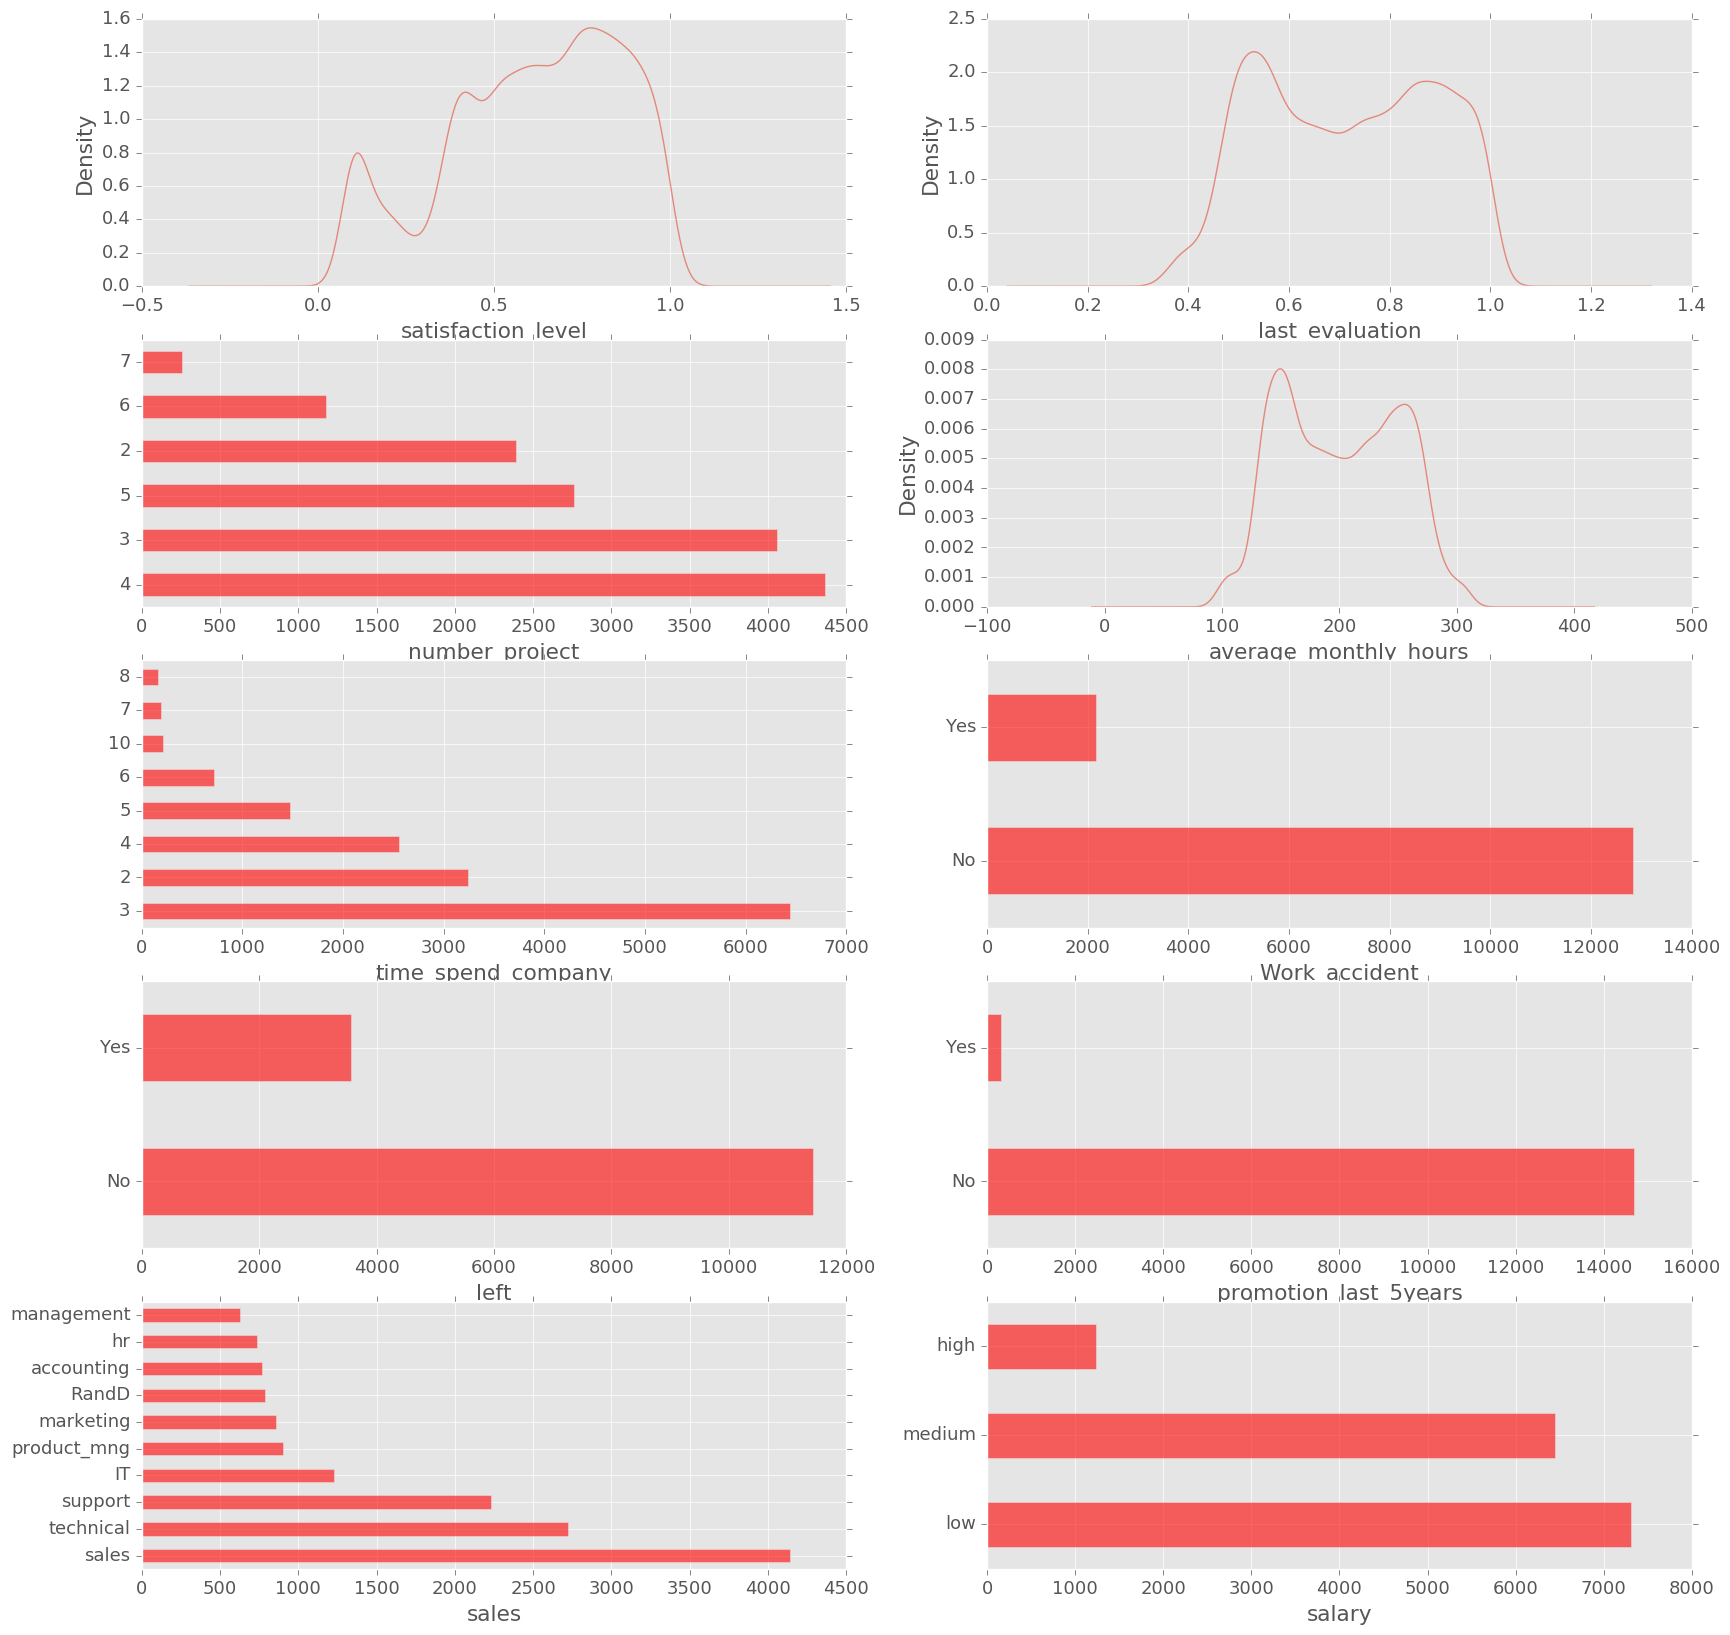

In [108]:
plt.rc("font", size=13)
plt.figure(figsize=(20,20))
alpha=0.6

ax1 = plt.subplot2grid((5,2), (0,0))
HRAnalysis.satisfaction_level.plot(kind="kde",alpha=alpha)
ax1.set_xlabel("satisfaction_level")

ax2 = plt.subplot2grid((5,2),(0,1))
HRAnalysis.last_evaluation.plot(kind="kde",alpha=alpha)
ax2.set_xlabel("last_evaluation")

ax3 = plt.subplot2grid((5,2),(1,0))
HRAnalysis.number_project.value_counts().plot(kind="barh",alpha=alpha,color='red')
ax3.set_xlabel("number_project")

ax4 = plt.subplot2grid((5,2),(1,1))
HRAnalysis.average_monthly_hours.plot(kind="kde",alpha=alpha)
ax4.set_xlabel("average_monthly_hours")

ax5 = plt.subplot2grid((5,2),(2,0))
HRAnalysis.time_spend_company.value_counts().plot(kind="barh",alpha=alpha,color='red')
ax5.set_xlabel("time_spend_company")

ax6 = plt.subplot2grid((5,2),(2,1))
HRAnalysis.Work_accident.value_counts().plot(kind="barh",alpha=alpha,color='red')
ax6.set_xlabel("Work_accident")
ax6.set_yticklabels(['No','Yes'])

ax7 = plt.subplot2grid((5,2),(3,0))
HRAnalysis.left.value_counts().plot(kind="barh",alpha=alpha,color='red')
ax7.set_xlabel("left")
ax7.set_yticklabels(['No','Yes'])

ax8 = plt.subplot2grid((5,2),(3,1))
HRAnalysis.promotion_last_5years.value_counts().plot(kind="barh",alpha=alpha,color='red')
ax8.set_xlabel("promotion_last_5years")
ax8.set_yticklabels(['No','Yes'])

ax9 = plt.subplot2grid((5,2),(4,0))
HRAnalysis.sales.value_counts().plot(kind="barh",alpha=alpha,color='red')
ax9.set_xlabel("sales")

ax10 = plt.subplot2grid((5,2),(4,1))
HRAnalysis.salary.value_counts().plot(kind="barh",alpha=alpha,color='red')
ax10.set_xlabel("salary")

## Observing data with respect to Job left or not

#### <ul><li>Left = 1</li><li>Not Left = 0</li></ul>

In [34]:
HRAnalysis.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary', 'left'],
      dtype='object')

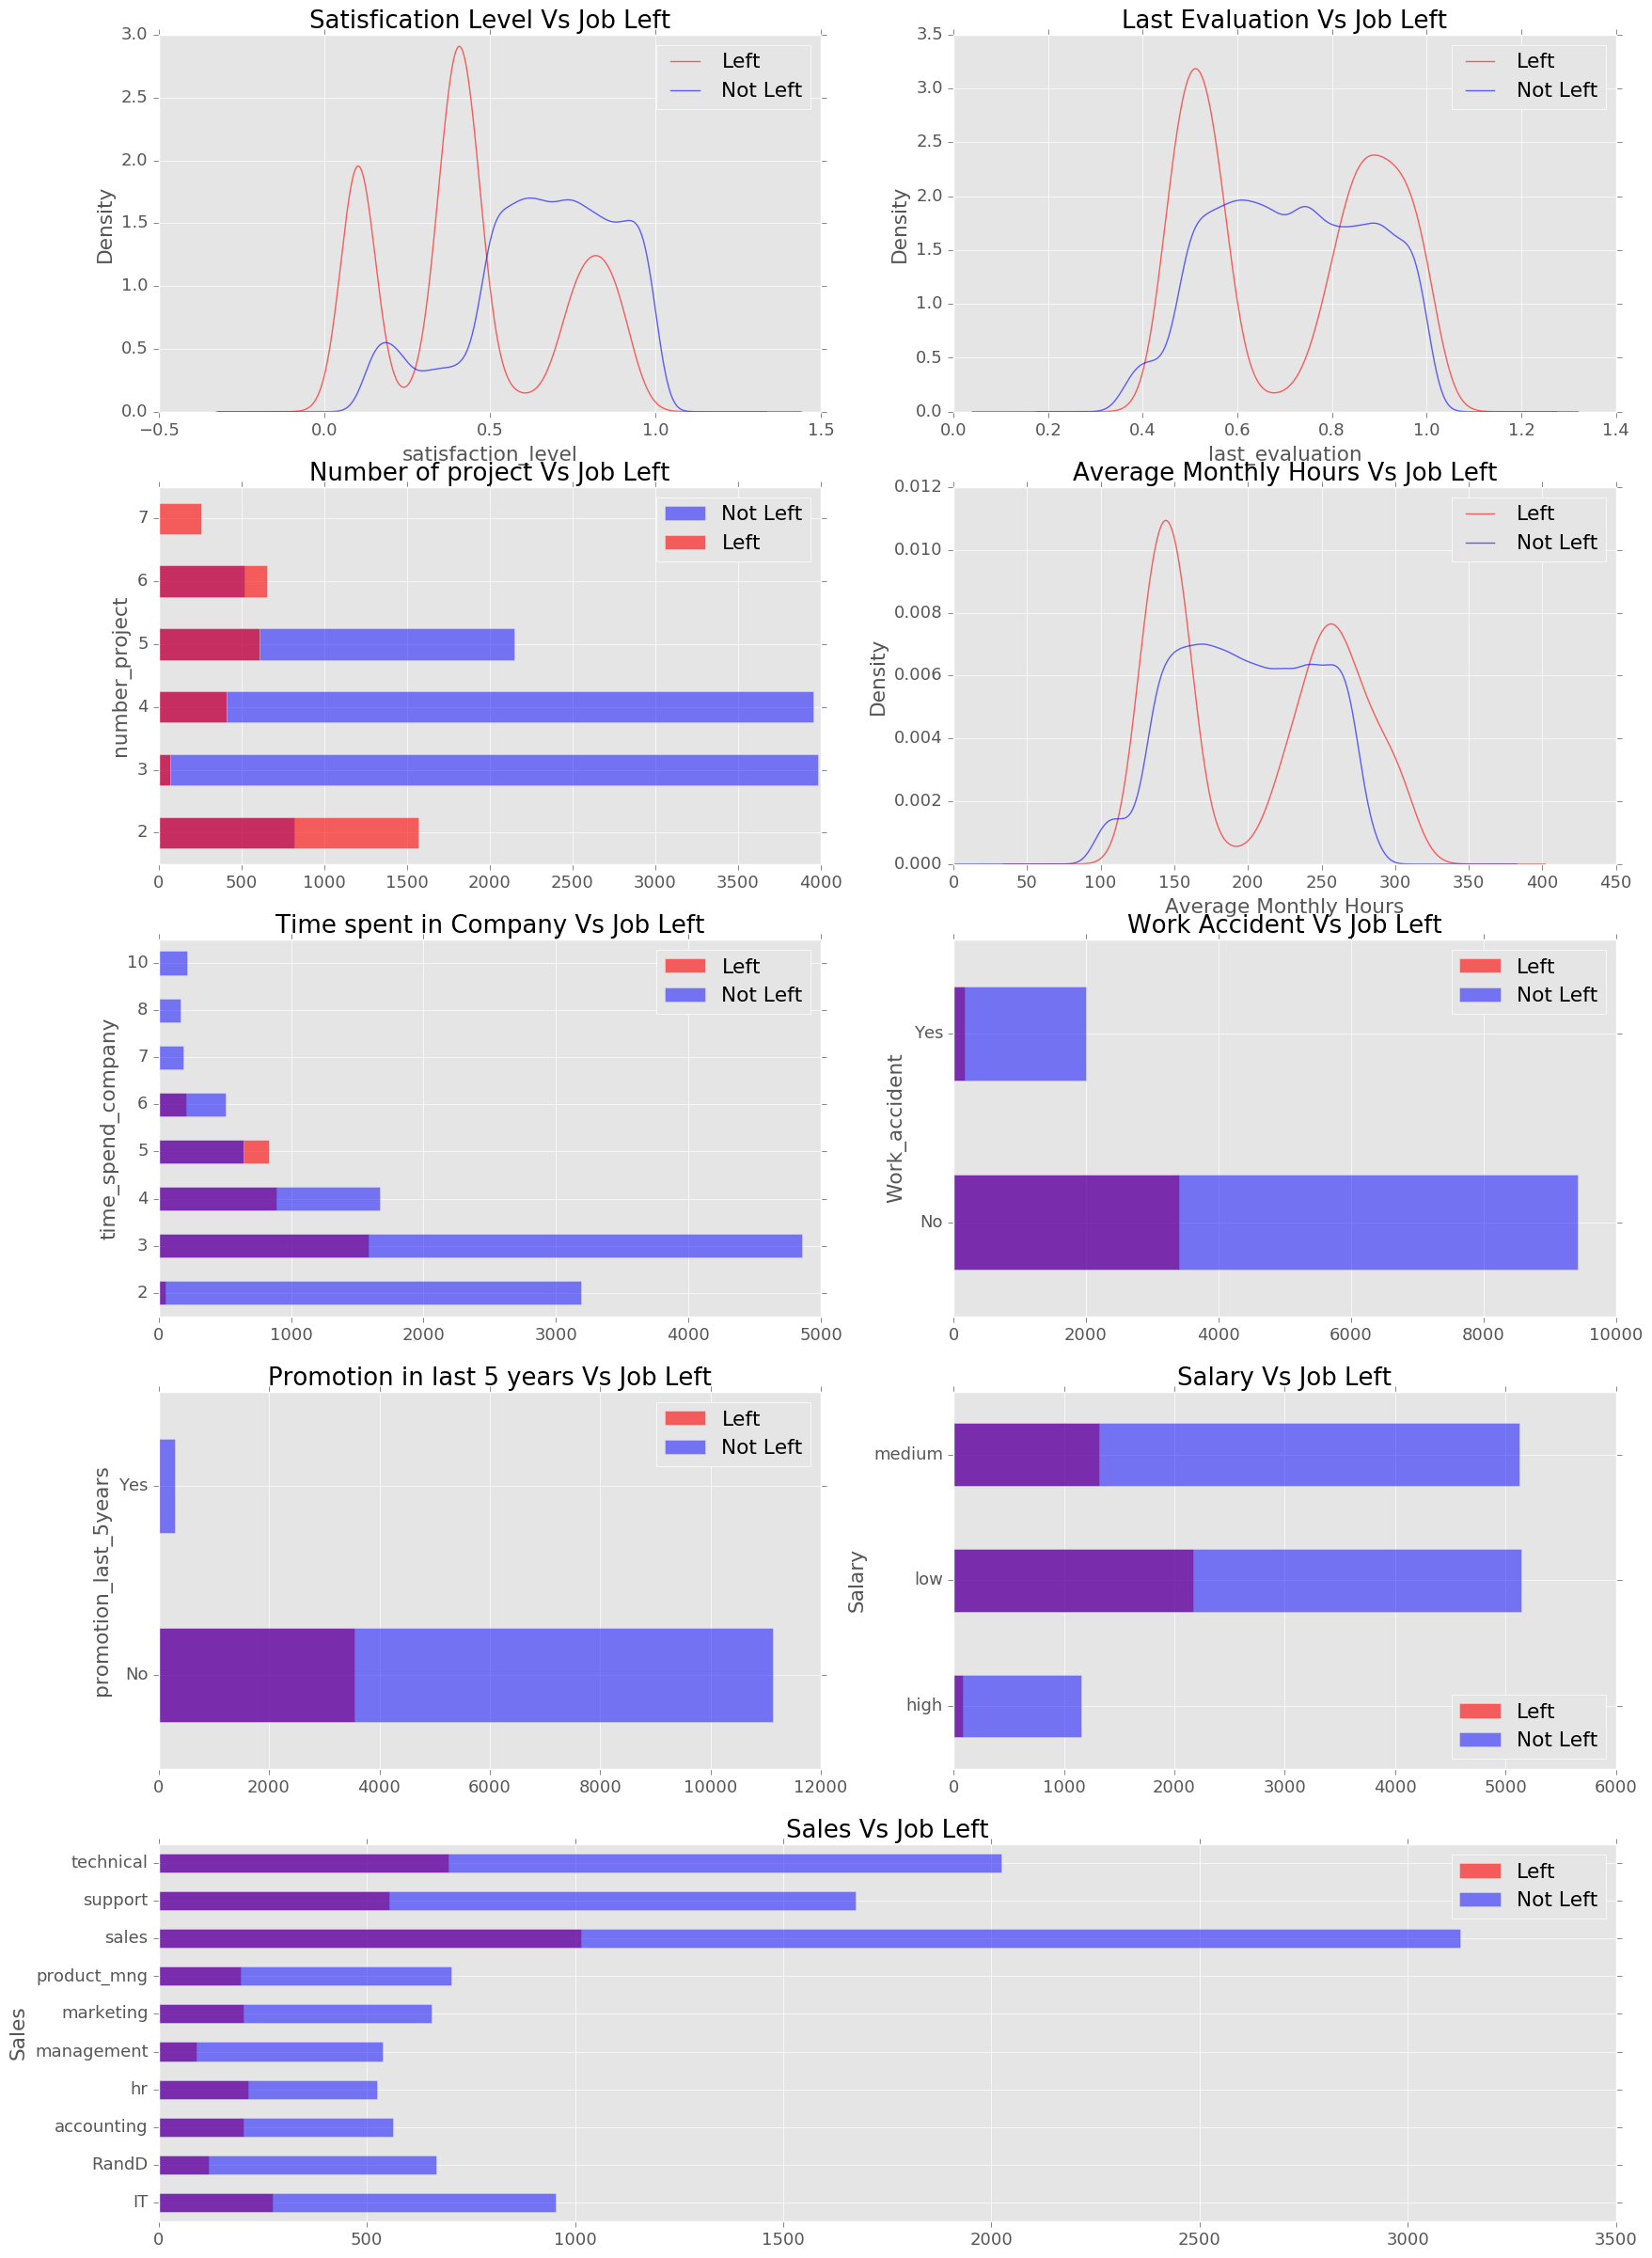

In [109]:
#satisfaction_level
fig = plt.figure(figsize=(20,30))

# Looking at the distributions, those employee whose satisfaction level has less than 0.5 had mostly left the job
ax1 = plt.subplot2grid((5,2), (0,0))
HRAnalysis[HRAnalysis.left==1].satisfaction_level.plot(kind="density",color="red",label="Left",alpha=alpha)
HRAnalysis[HRAnalysis.left==0].satisfaction_level.plot(kind="density",color="blue",label="Not Left",alpha=alpha)
ax1.set_xlabel("satisfaction_level")
ax1.set_title("Satisfication Level Vs Job Left")
plt.legend(loc="best")

# Looking at the distributions, those employee whose last evaluation rate between 0.6 to 0.8 had least job left rate
ax2 = plt.subplot2grid((5,2), (0,1))
HRAnalysis[HRAnalysis.left==1].last_evaluation.plot(kind="density",color="red",label="Left",alpha=alpha)
HRAnalysis[HRAnalysis.left==0].last_evaluation.plot(kind="density",color="blue",label="Not Left",alpha=alpha)
ax2.set_xlabel("last_evaluation")
ax2.set_title("Last Evaluation Vs Job Left")
plt.legend(loc="best")


# Looking at the distributions, those employee who were working on number of project 3,4,5 had least let their job
ax3 = plt.subplot2grid((5,2), (1,0))
HRAnalysis[HRAnalysis.left==0].number_project.value_counts().sort_index().plot(kind="barh",color="blue",label="Not Left",alpha=alpha-0.1)
HRAnalysis[HRAnalysis.left==1].number_project.value_counts().sort_index().plot(kind="barh",color="red",label="Left",alpha=alpha)
ax3.set_ylabel("number_project")
ax3.set_title("Number of project Vs Job Left")
plt.legend(loc="best")

# Looking at the distributions, those employee whose average monthly hours is around 200 had least job left rate
ax4 = plt.subplot2grid((5,2), (1,1))
HRAnalysis[HRAnalysis.left==1].average_monthly_hours.plot(kind="density",color="red",label="Left",alpha=alpha)
HRAnalysis[HRAnalysis.left==0].average_monthly_hours.plot(kind="density",color="blue",label="Not Left",alpha=alpha)
ax4.set_xlabel("Average Monthly Hours")
ax4.set_title("Average Monthly Hours Vs Job Left")
plt.legend(loc="best")


# Looking at the distributions, those employee who spent hours in company had left their job more comparison to others
ax5 = plt.subplot2grid((5,2), (2,0))
HRAnalysis[HRAnalysis.left==1].time_spend_company.value_counts().sort_index().plot(kind="barh",color="red",label="Left",alpha=alpha)
HRAnalysis[HRAnalysis.left==0].time_spend_company.value_counts().sort_index().plot(kind="barh",color="blue",label="Not Left",alpha=alpha-0.1)
ax5.set_ylabel("time_spend_company")
ax5.set_title("Time spent in Company Vs Job Left")
plt.legend(loc="best")


# Looking at the distributions, those employee who spent hours in company had let their job more comparison to others
ax6 = plt.subplot2grid((5,2), (2,1))
HRAnalysis[HRAnalysis.left==1].Work_accident.value_counts().sort_index().plot(kind="barh",color="red",label="Left",alpha=alpha)
HRAnalysis[HRAnalysis.left==0].Work_accident.value_counts().sort_index().plot(kind="barh",color="blue",label="Not Left",alpha=alpha-0.1)
ax6.set_ylabel("Work_accident")
ax6.set_yticklabels(['No','Yes'])
ax6.set_title("Work Accident Vs Job Left")
plt.legend(loc="best")


# Looking at the distributions, no promotion in last 5 years are leaving job
ax7 = plt.subplot2grid((5,2), (3,0))
HRAnalysis[HRAnalysis.left==1].promotion_last_5years.value_counts().sort_index().plot(kind="barh",color="red",label="Left",alpha=alpha)
HRAnalysis[HRAnalysis.left==0].promotion_last_5years.value_counts().sort_index().plot(kind="barh",color="blue",label="Not Left",alpha=alpha-0.1)
ax7.set_ylabel("promotion_last_5years")
ax7.set_yticklabels(['No','Yes'])
ax7.set_title("Promotion in last 5 years Vs Job Left")
plt.legend(loc="best")


# Looking at the distributions, low salary employee are more tends to leave job
ax8 = plt.subplot2grid((5,2), (3,1))
HRAnalysis[HRAnalysis.left==1].salary.value_counts().sort_index().plot(kind="barh",color="red",label="Left",alpha=alpha)
HRAnalysis[HRAnalysis.left==0].salary.value_counts().sort_index().plot(kind="barh",color="blue",label="Not Left",alpha=alpha-0.1)
ax8.set_ylabel("Salary")
ax8.set_title("Salary Vs Job Left")
plt.legend(loc="best")


ax9 = plt.subplot2grid((5,2), (4,0),colspan=2)
HRAnalysis[HRAnalysis.left==1].sales.value_counts().sort_index().plot(kind="barh",color="red",label="Left",alpha=alpha)
HRAnalysis[HRAnalysis.left==0].sales.value_counts().sort_index().plot(kind="barh",color="blue",label="Not Left",alpha=alpha-0.1)
ax9.set_ylabel("Sales")
ax9.set_title("Sales Vs Job Left")
plt.legend(loc="best")

In [153]:
SatLevel_lessthan_5 = HRAnalysis[HRAnalysis.satisfaction_level <= 0.5]
SatLevel_greaterthan_5 = HRAnalysis[HRAnalysis.satisfaction_level > 0.5]

print("Percentage of employees left or not based on satisfication level")
print("Not Left percentage when satisfaction level <= 0.5 is ", int((SatLevel_lessthan_5[SatLevel_lessthan_5.left==0].shape[0]/SatLevel_lessthan_5.shape[0])*100))
print("Left percentage when satisfaction level <= 0.5 is ", int((SatLevel_lessthan_5[SatLevel_lessthan_5.left==1].shape[0]/SatLevel_lessthan_5.shape[0])*100))
print("-------------------------------------------------------------------")
print("Not Left percentage when satisfaction level > 0.5 is ", int((SatLevel_greaterthan_5[SatLevel_greaterthan_5.left==0].shape[0]/SatLevel_greaterthan_5.shape[0])*100))
print("Left percentage when satisfaction level > 0.5 is ",int((SatLevel_greaterthan_5[SatLevel_greaterthan_5.left==1].shape[0]/SatLevel_greaterthan_5.shape[0])*100))

Percentage of employees left or not based on satisfication level
Not Left percentage when satisfaction level <= 0.5 is  47
Left percentage when satisfaction level <= 0.5 is  52
-------------------------------------------------------------------
Not Left percentage when satisfaction level > 0.5 is  89
Left percentage when satisfaction level > 0.5 is  10


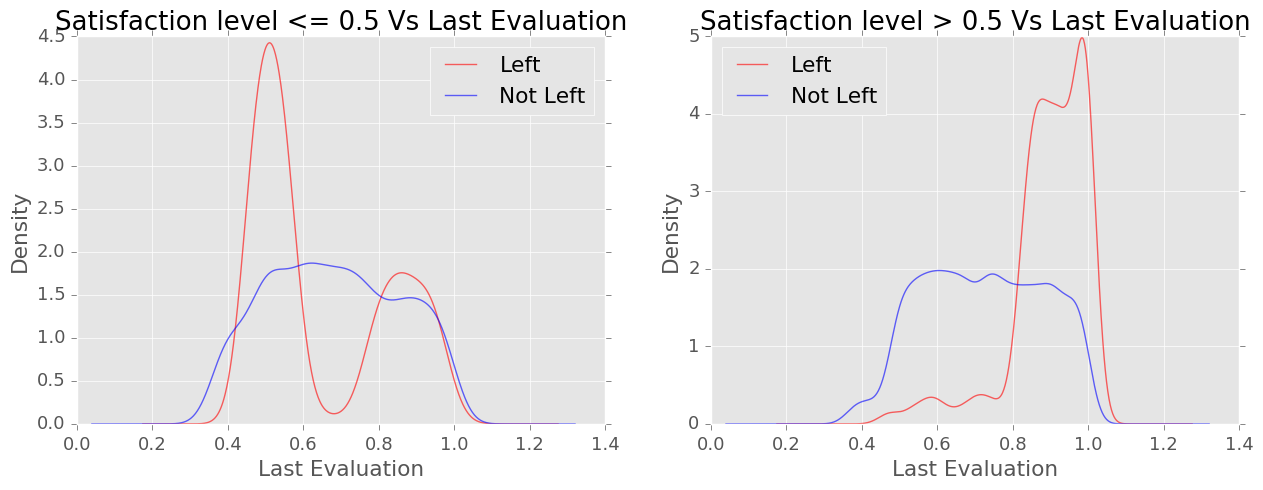

In [126]:
fig = plt.figure(figsize=(15, 5))

ax1 =  plt.subplot2grid((1,2),(0,0))
SatLevel_lessthan_5[SatLevel_lessthan_5.left==1].last_evaluation.plot(kind="density",color="red",alpha=0.6,label="Left")
SatLevel_lessthan_5[SatLevel_lessthan_5.left==0].last_evaluation.plot(kind="density",color="blue",alpha=0.6,label="Not Left")
ax1.set_xlabel("Last Evaluation")
ax1.set_title("Satisfaction level <= 0.5 Vs Last Evaluation")
plt.legend(loc="best")


ax2 =  plt.subplot2grid((1,2),(0,1))
SatLevel_greaterthan_5[SatLevel_greaterthan_5.left==1].last_evaluation.plot(kind="density",color="red",alpha=0.6,label="Left")
SatLevel_greaterthan_5[SatLevel_greaterthan_5.left==0].last_evaluation.plot(kind="density",color="blue",alpha=0.6,label="Not Left")
ax2.set_xlabel("Last Evaluation")
ax2.set_title("Satisfaction level > 0.5 Vs Last Evaluation")
plt.legend(loc="best")